In [15]:
import netCDF4
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# read the netcdf file
nc = netCDF4.Dataset("sample_data_4.nc", "r", format="NETCDF4")

min_lat = 17
max_lat = 23

min_lon = 87
max_lon = 93


# get all lat and lon values
lat = nc.variables["lat"][:]
lon = nc.variables["lon"][:]


# lat starts at -90 and ends at 90
# lat has 17999 indexes
# this function will return the index of the closest value to the given value
def get_lat_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


# lon starts at -180 and ends at 180
# lon has 36000 indexes
# this function will return the index of the closest value to the given value
def get_lon_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

print('Min Lat', min_lat, 'Min Lat Index', get_lat_index(lat, min_lat), 'verified lat', lat[get_lat_index(lat, min_lat)])
print('Max Lat', max_lat, 'Max Lat Index', get_lat_index(lat, max_lat), 'verified lat', lat[get_lat_index(lat, max_lat)])
print('Min Lon', min_lon, 'Min Lon Index', get_lon_index(lon, min_lon), 'verified lon', lon[get_lon_index(lon, min_lon)])
print('Max Lon', max_lon, 'Max Lon Index', get_lon_index(lon, max_lon), 'verified lon', lon[get_lon_index(lon, max_lon)])


# lats = lat from index of min_lat to index of max_lat
lats = lat[get_lat_index(lat, min_lat) : get_lat_index(lat, max_lat)]
# lons = lon from index of min_lon to index of max_lon
lons = lon[get_lon_index(lon, min_lon) : get_lon_index(lon, max_lon)]

sst = nc.variables["analysed_sst"][
    0,
    get_lat_index(lat, min_lat) : get_lat_index(lat, max_lat),
    get_lon_index(lon, min_lon) : get_lon_index(lon, max_lon),
]

# convert the sst unit from kelvin to celsius
sst = sst - 273.15

Min Lat 17 Min Lat Index 10699 verified lat 17.0
Max Lat 23 Max Lat Index 11299 verified lat 23.0
Min Lon 87 Min Lon Index 26699 verified lon 87.0
Max Lon 93 Max Lon Index 27299 verified lon 93.0


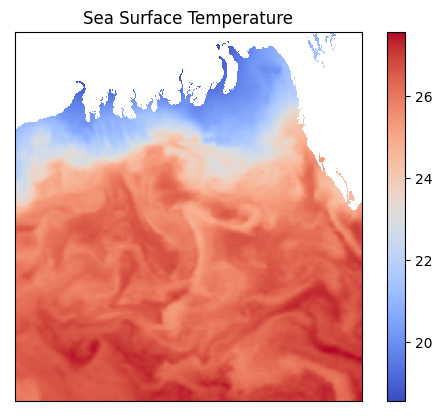

In [16]:
min_lat = 17
max_lat = 23

min_lon = 87
max_lon = 93

# create a basemap instance
map = Basemap(
    projection="merc",
    llcrnrlon=min_lon,
    llcrnrlat=min_lat,
    urcrnrlon=max_lon,
    urcrnrlat=max_lat,
    resolution="i",
)
# map.drawcoastlines()
# map.drawcountries()
# map.drawlsmask(land_color="#A1887F", ocean_color="#4FC3F7")

lons, lats = np.meshgrid(lons, lats)

x, y = map(lons, lats)

map.pcolormesh(x, y, sst, cmap=plt.cm.coolwarm)

# add colorbar and title besides the plot
plt.colorbar(orientation="vertical")
plt.title("Sea Surface Temperature")

plt.show()


/tmp/ipykernel_44321/2280265216.py:6: RuntimeWarning: invalid value encountered in sqrt
  sst_grad_mag = np.sqrt(sst_lat_grad ** 2 + sst_lon_grad ** 2)


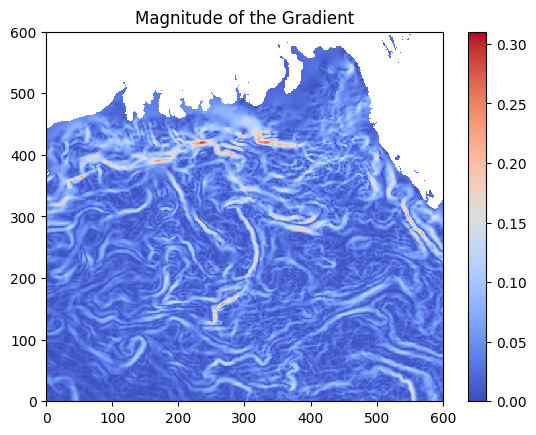

In [17]:
# get the gradient of the sst in lat and lon
sst_lat_grad = np.gradient(sst, axis=0)
sst_lon_grad = np.gradient(sst, axis=1)

# get the magnitude of the gradient
sst_grad_mag = np.sqrt(sst_lat_grad ** 2 + sst_lon_grad ** 2)

# multiply the magnitude of the gradient values with 100
# sst_grad_mag = sst_grad_mag * 100

# plot the magnitude of the gradient
plt.pcolormesh(sst_grad_mag, cmap=plt.cm.coolwarm)
plt.colorbar(orientation="vertical")
plt.title("Magnitude of the Gradient")

plt.show()

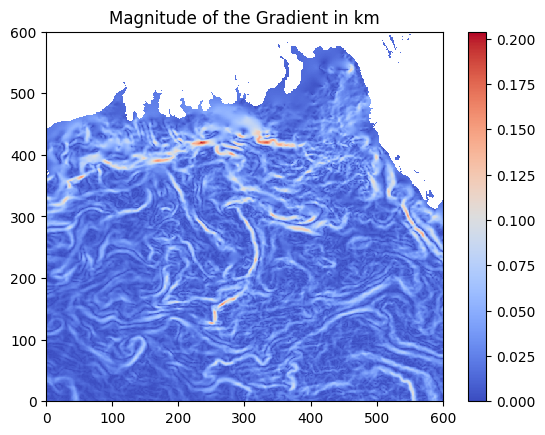

In [18]:
# function to convert lat from degree to km
def lat_to_km(lat):
    return 111.32 * lat

# function to convert lon from degree to km
def lon_to_km(lon, lat):
    return 111.32 * lon * np.cos(lat * np.pi / 180)

# get the lat and lon values in km
lats_km = lat_to_km(lats)
lons_km = lon_to_km(lons, lats)

# get the gradient of the lat and lon values in km
lats_km_grad = np.gradient(lats_km, axis=0)
lons_km_grad = np.gradient(lons_km, axis=1)

# get the magnitude of the gradient of the lat and lon values in km
lats_lons_grad_mag = np.sqrt(lats_km_grad ** 2 + lons_km_grad ** 2)

# get the magnitude of the gradient of the sst in km
sst_grad_mag_km = sst_grad_mag / lats_lons_grad_mag

# plot the magnitude of the gradient of the sst in km
plt.pcolormesh(sst_grad_mag_km, cmap=plt.cm.coolwarm)

plt.colorbar(orientation="vertical")
plt.title("Magnitude of the Gradient in km")

plt.show()